In [12]:
# Imports
import numpy as np                               
import pandas as pd                        
import matplotlib.pyplot as plt                  
import cv2             
import tensorflow as tf                          
from PIL import Image                           
import os                                        
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical          
from tensorflow.keras.models import load_model                                 
import warnings
from skimage import exposure
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

from os import listdir
import sys

In [86]:
print(tf.__version__)

2.6.2


In [2]:
output_path = '/gpfs/space/home/markusha/project/output/dataframes/'

In [3]:
# Load dataframe from pickled pandas object
dataframe1 = pd.read_pickle(output_path + 'Kaggle_data_fixed.pkl')
dataframe2 = pd.read_pickle(output_path + 'Larssen_data1.pkl')
dataframe3 = pd.read_pickle(output_path + 'Larssen_data2.pkl')
dataframe4 = pd.read_pickle(output_path + 'GTSRB_data.pkl')
dataframe5 = pd.read_pickle(output_path + 'Belgium_data_fixed.pkl')

In [4]:
training_data = dataframe1[['sign','img_path']].append(dataframe2[['sign','img_path']]).append(dataframe3[['sign','img_path']]).append(dataframe4[['sign','img_path']]).append(dataframe5[['sign','img_path']])

In [6]:
training_data['sign'].value_counts()

50_SIGN          2394
GIVE_WAY         2391
30_SIGN          2246
70_SIGN          2189
PRIORITY_ROAD    2100
                 ... 
10_SIGN             4
25_SIGN             3
15_SIGN             2
110_SIGN            2
130_SIGN            1
Name: sign, Length: 96, dtype: int64

In [14]:
data = []
labels = np.array([])
data_clahe = []

In [15]:
for _, image_file in training_data.iterrows():
    image = cv2.imread(image_file['img_path'])
    #resizing
    image = cv2.resize(image, (50,50), interpolation = cv2.INTER_AREA)
    image = np.array(image)
    # using clahe algorithm
    image_p = exposure.equalize_adapthist(image, clip_limit=0.1)
    data_clahe.append(image_p)
    # data = np.append(data,image)
    data.append(image)
    labels = np.append(labels, image_file['sign'])
data_clahe = np.array(data_clahe)

In [16]:
labels

array(['90_SIGN', '90_SIGN', '80_SIGN', ..., 'WIDTH_LIMIT', 'WIDTH_LIMIT',
       'WIDTH_LIMIT'], dtype='<U36')

In [17]:
labels = list(map(lambda x: x.replace(' ', ''), labels))

In [18]:
print((np.unique(labels)))
classes = len(np.unique(labels))

['100_SIGN' '10_SIGN' '110_SIGN' '120_SIGN' '130_SIGN' '15_SIGN' '20_SIGN'
 '25_SIGN' '30_SIGN' '40_SIGN' '50_SIGN' '5_SIGN' '60_SIGN' '70_SIGN'
 '80_SIGN' '80_SIGN_END' '90_SIGN' 'ALL_END' 'BUMP' 'CHILDREN'
 'CROSSROADS_PRIORITY_RIGHT' 'CROSSROADS_WITH_MINOR' 'CURVES_FIRST_LEFT'
 'CURVES_FIRST_RIGHT' 'CURVE_LEFT' 'CURVE_RIGHT' 'CYCLE_PATH' 'CYCLISTS'
 'DANGER' 'DOMESTIC_ANIMALS' 'GIVE_WAY' 'GIVE_WAY_TO_ONCOMING' 'GO_LEFT'
 'GO_STRAIGHT' 'GO_STRAIGHT_OR_TURN_LEFT' 'GO_STRAIGHT_OR_TURN_RIGHT'
 'HEIGHT_LIMIT' 'ICE_OR_SNOW' 'LEVEL_CROSSING_WITH_BARRIERS_AHEAD' 'MISC'
 'NO_ENTRY' 'NO_LEFT_TURN' 'NO_OVERTAKING' 'NO_OVERTAKING_END'
 'NO_OVERTAKING_HEAVY' 'NO_OVERTAKING_HEAVY_END' 'NO_PARKING'
 'NO_PARKING_FROM_1ST_TO_15TH' 'NO_PEDAL_CYCLES' 'NO_RIGHT_TURN'
 'NO_STOPPING_NO_STANDING' 'NO_VECHILES' 'NO_VECHILES_HEAVY' 'OTHER'
 'PASS_EITHER_SIDE' 'PASS_LEFT_SIDE' 'PASS_RIGHT_SIDE' 'PEDESTRIANS'
 'PEDESTRIAN_CROSSING' 'PRIORITY_ROAD' 'ROADWORKS' 'ROAD_NARROWS'
 'ROAD_NARROWS_LEFT' 'ROAD_NARROWS_

In [19]:
# We need to One-Hot Encode the labels
char_to_int = dict((c, i) for i, c in enumerate(np.unique(labels)))
labels_integer_encoded = [char_to_int[char] for char in labels]
print(char_to_int)
labels_1hot = to_categorical(labels_integer_encoded)


{'100_SIGN': 0, '10_SIGN': 1, '110_SIGN': 2, '120_SIGN': 3, '130_SIGN': 4, '15_SIGN': 5, '20_SIGN': 6, '25_SIGN': 7, '30_SIGN': 8, '40_SIGN': 9, '50_SIGN': 10, '5_SIGN': 11, '60_SIGN': 12, '70_SIGN': 13, '80_SIGN': 14, '80_SIGN_END': 15, '90_SIGN': 16, 'ALL_END': 17, 'BUMP': 18, 'CHILDREN': 19, 'CROSSROADS_PRIORITY_RIGHT': 20, 'CROSSROADS_WITH_MINOR': 21, 'CURVES_FIRST_LEFT': 22, 'CURVES_FIRST_RIGHT': 23, 'CURVE_LEFT': 24, 'CURVE_RIGHT': 25, 'CYCLE_PATH': 26, 'CYCLISTS': 27, 'DANGER': 28, 'DOMESTIC_ANIMALS': 29, 'GIVE_WAY': 30, 'GIVE_WAY_TO_ONCOMING': 31, 'GO_LEFT': 32, 'GO_STRAIGHT': 33, 'GO_STRAIGHT_OR_TURN_LEFT': 34, 'GO_STRAIGHT_OR_TURN_RIGHT': 35, 'HEIGHT_LIMIT': 36, 'ICE_OR_SNOW': 37, 'LEVEL_CROSSING_WITH_BARRIERS_AHEAD': 38, 'MISC': 39, 'NO_ENTRY': 40, 'NO_LEFT_TURN': 41, 'NO_OVERTAKING': 42, 'NO_OVERTAKING_END': 43, 'NO_OVERTAKING_HEAVY': 44, 'NO_OVERTAKING_HEAVY_END': 45, 'NO_PARKING': 46, 'NO_PARKING_FROM_1ST_TO_15TH': 47, 'NO_PEDAL_CYCLES': 48, 'NO_RIGHT_TURN': 49, 'NO_STOPP

In [105]:
# shuffeling data
from sklearn.utils import shuffle

data_clahe, labels_1hot = shuffle(np.array(data_clahe), np.array(labels_1hot))

# predicting with CLAHE data
X_train, X_test, y_train, y_test = train_test_split(data_clahe, labels_1hot, test_size=0.2, random_state=69)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42848, 50, 50, 3) (10712, 50, 50, 3) (42848, 78) (10712, 78)


In [106]:
classes = y_train.shape[1]
print("# classes: " + str(classes))

# classes: 78


In [107]:
# TrafficNet
model2 = Sequential()
inputShape = X_train.shape[1:]
chanDim = -1
model2.add(Conv2D(8, (5, 5), padding="same",input_shape=inputShape))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# first set of (CONV => RELU => CONV => RELU) * 2 => POOL
model2.add(Conv2D(16, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(Conv2D(16, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# second set of (CONV => RELU => CONV => RELU) * 2 => POOL
model2.add(Conv2D(32, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(Conv2D(32, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# first set of FC => RELU layers
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation("relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
# second set of FC => RELU layers
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation("relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
# softmax classifier
model2.add(Dense(classes))
model2.add(Activation("softmax"))




In [108]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 8)         608       
_________________________________________________________________
activation_8 (Activation)    (None, 50, 50, 8)         0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 50, 50, 8)         32        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 16)        1168      
_________________________________________________________________
activation_9 (Activation)    (None, 25, 25, 16)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 25, 25, 16)       

In [110]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(X_train, y_train, batch_size=64, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
670/670 [==============================] - 34s 48ms/step - loss: 1.6136 - accuracy: 0.6042 - val_loss: 0.4214 - val_accuracy: 0.8948
Epoch 2/40
670/670 [==============================] - 32s 47ms/step - loss: 0.5536 - accuracy: 0.8550 - val_loss: 0.2518 - val_accuracy: 0.9350
Epoch 3/40
670/670 [==============================] - 32s 48ms/step - loss: 0.3805 - accuracy: 0.8991 - val_loss: 0.1873 - val_accuracy: 0.9537
Epoch 4/40
670/670 [==============================] - 32s 47ms/step - loss: 0.2938 - accuracy: 0.9215 - val_loss: 0.1635 - val_accuracy: 0.9585
Epoch 5/40
670/670 [==============================] - 32s 48ms/step - loss: 0.2506 - accuracy: 0.9331 - val_loss: 0.1559 - val_accuracy: 0.9617
Epoch 6/40
670/670 [==============================] - 32s 47ms/step - loss: 0.2123 - accuracy: 0.9426 - val_loss: 0.1280 - val_accuracy: 0.9708
Epoch 7/40
670/670 [==============================] - 32s 48ms/step - loss: 0.1839 - accuracy: 0.9520 - val_loss: 0.1314 - val_accuracy:

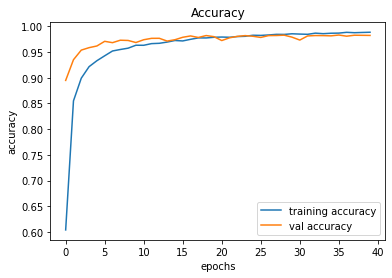

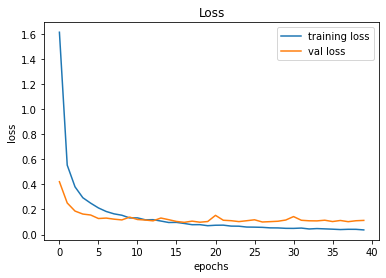

In [111]:
model2.save("Trafic_signs_model_final2.h5")
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
#plotting graphs for loss 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# model2 = load_model('Trafic_signs_model_final.h5')

In [129]:
predictions = model2.predict(data_clahe)

In [130]:
predictions.shape

(53560, 78)

In [131]:
labels_1hot.shape

(53560, 78)

In [132]:
int_to_char = {k:v for k,v in zip(char_to_int.values(),char_to_int.keys())}

In [133]:
predictions_integer = [np.argmax(x) for x in predictions]

In [135]:
labels_predicted = [int_to_char[integer] for integer in list(predictions_integer)]

In [137]:
labels_integer_encoded = [np.argmax(x) for x in labels_1hot]

In [138]:
labels_true = [int_to_char[integer] for integer in labels_integer_encoded]

In [139]:
def prediction_to_label(model, X_test, char_to_int):
    predictions = model.predict(X_test)
    predictions = [np.argmax(x) for x in predictions]
    int_to_char = {k:v for k,v in zip(char_to_int.values(),char_to_int.keys())}
    labels_predicted = [int_to_char[integer] for integer in predictions]
    return labels_predicted

In [140]:
labels_predicted

['CROSSROADS_WITH_MINOR',
 'NO_ENTRY',
 'ROUNDABOUT',
 '80_SIGN',
 '120_SIGN',
 'GIVE_WAY',
 'GIVE_WAY',
 'GO_STRAIGHT_OR_TURN_RIGHT',
 '70_SIGN',
 '70_SIGN',
 '80_SIGN',
 '100_SIGN',
 'NO_OVERTAKING',
 'DANGER',
 'ROUNDABOUT',
 'PASS_RIGHT_SIDE',
 'GIVE_WAY',
 'GO_STRAIGHT',
 '70_SIGN',
 '60_SIGN',
 '50_SIGN',
 '120_SIGN',
 '70_SIGN',
 'PRIORITY_ROAD',
 'NO_ENTRY',
 'NO_OVERTAKING_HEAVY',
 'WILD_ANIMALS',
 'NO_VECHILES',
 '80_SIGN_END',
 'NO_ENTRY',
 'CURVES_FIRST_LEFT',
 'OTHER',
 '70_SIGN',
 '20_SIGN',
 'NO_VECHILES_HEAVY',
 '50_SIGN',
 'UNEVEN_SURFACE',
 '50_SIGN',
 'CURVES_FIRST_LEFT',
 'GIVE_WAY',
 'NO_OVERTAKING_HEAVY_END',
 'PRIORITY_ROAD',
 'NO_VECHILES',
 '120_SIGN',
 '120_SIGN',
 'NO_OVERTAKING',
 '70_SIGN',
 'PASS_RIGHT_SIDE',
 '30_SIGN',
 'PRIORITY_ROAD',
 'ROAD_NARROWS_RIGHT',
 'WILD_ANIMALS',
 'PASS_LEFT_SIDE',
 'NO_OVERTAKING_HEAVY',
 'PASS_RIGHT_SIDE',
 'NO_OVERTAKING',
 '120_SIGN',
 'PRIORITY_ROAD',
 'ICE_OR_SNOW',
 'CROSSROADS_WITH_MINOR',
 'TRAFFIC_SIGNALS',
 'NO_EN

In [32]:
# import pickle

In [33]:
# a_file = open("char_to_int.pkl", "wb")
# pickle.dump(char_to_int, a_file)
# a_file.close()

## open as 
#a_file = open("char_to_int.pkl", "rb")
#output = pickle.load(a_file)
#print(output)


In [60]:
# Description

# # Let's predict the whole dataset
# data = np.array(data_clahe)

In [64]:
# predictions = model2.predict(data)

In [17]:
# predictions2 = [np.argmax(x) for x in predictions] #index

In [141]:
 prediction_strength = [predictions[i][j] for i,j in enumerate(predictions_integer)]

In [142]:
df = pd.DataFrame({'label' : labels_true, 'predicted':labels_predicted, 'strength':prediction_strength})

In [143]:
df['correct'] = list(df['label'] ==df['predicted'])

In [144]:
df

,label,predicted,strength,correct
0,CROSSROADS_WITH_MINOR,CROSSROADS_WITH_MINOR,1.000000,True
1,NO_ENTRY,NO_ENTRY,1.000000,True
2,ROUNDABOUT,ROUNDABOUT,1.000000,True
3,80_SIGN,80_SIGN,0.999996,True
4,120_SIGN,120_SIGN,1.000000,True
...,...,...,...,...
53555,PRIORITY_ROAD,PRIORITY_ROAD,1.000000,True
53556,NO_VECHILES_HEAVY,NO_VECHILES_HEAVY,0.999999,True
53557,PRIORITY_ROAD,PRIORITY_ROAD,1.000000,True
53558,50_SIGN,50_SIGN,0.989730,True


In [145]:
df[df.predicted=='PRIORITY_ROAD'][df.correct == False].size

/gpfs/space/home/markusha/venv_example/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


60

In [146]:
df[df.predicted=='PRIORITY_ROAD'].size

14824

In [147]:
df[df['correct']][['label', 'strength']].groupby('label',as_index=False).mean().sort_values('strength',ascending = False)

,label,strength
70,TURN_RIGHT,1.000000
32,GO_STRAIGHT_OR_TURN_LEFT,0.999995
69,TURN_LEFT,0.999992
43,NO_OVERTAKING_HEAVY_END,0.999969
62,ROUNDABOUT,0.999966
...,...,...
9,5_SIGN,0.975166
67,TRAFFICLIGHT,0.973433
72,URDBL,0.963436
27,DOMESTIC_ANIMALS,0.950923


In [148]:
df[df['correct']][['label', 'strength']].groupby('label',as_index=False).mean().sort_values('strength',ascending = True).head(3)

,label,strength
1,10_SIGN,0.932942
27,DOMESTIC_ANIMALS,0.950923
72,URDBL,0.963436


In [149]:
df[df['correct'] == False][['label', 'strength']].groupby('label',as_index=False).mean().sort_values('strength',ascending = True).head(3)

,label,strength
45,TRAFFIC_SIGNALS,0.211125
38,ROADWORKS,0.225370
16,CROSSROADS_WITH_MINOR,0.280028


In [150]:
df[df['correct'] == False][['label', 'strength']].groupby('label',as_index=False).mean().sort_values('strength',ascending = False)

,label,strength
37,PRIORITY_ROAD,1.000000
4,130_SIGN,0.999766
28,NO_PEDAL_CYCLES,0.999606
18,CURVES_FIRST_RIGHT,0.970156
35,PASS_RIGHT_SIDE,0.931794
30,NO_VECHILES,0.930574
41,SEGREGATED_PEDESTRIAN_AND_CYCLE_PATH,0.875694
33,PASS_EITHER_SIDE,0.866561
10,5_SIGN,0.863613
29,NO_STOPPING_NO_STANDING,0.862995


In [151]:
from sklearn.metrics import roc_auc_score

In [154]:
predictions.shape

(53560, 78)

In [156]:
from sklearn.metrics import classification_report

In [158]:
y_pred=np.argmax(predictions, axis=1)

In [159]:
list(char_to_int.keys())

['100_SIGN',
 '10_SIGN',
 '110_SIGN',
 '120_SIGN',
 '130_SIGN',
 '15_SIGN',
 '20_SIGN',
 '25_SIGN',
 '30_SIGN',
 '40_SIGN',
 '50_SIGN',
 '5_SIGN',
 '60_SIGN',
 '70_SIGN',
 '80_SIGN',
 '80_SIGN_END',
 '90_SIGN',
 'ALL_END',
 'BUMP',
 'CHILDREN',
 'CROSSROADS_PRIORITY_RIGHT',
 'CROSSROADS_WITH_MINOR',
 'CURVES_FIRST_LEFT',
 'CURVES_FIRST_RIGHT',
 'CURVE_LEFT',
 'CURVE_RIGHT',
 'CYCLE_PATH',
 'CYCLISTS',
 'DANGER',
 'DOMESTIC_ANIMALS',
 'GIVE_WAY',
 'GIVE_WAY_TO_ONCOMING',
 'GO_LEFT',
 'GO_STRAIGHT',
 'GO_STRAIGHT_OR_TURN_LEFT',
 'GO_STRAIGHT_OR_TURN_RIGHT',
 'HEIGHT_LIMIT',
 'ICE_OR_SNOW',
 'LEVEL_CROSSING_WITH_BARRIERS_AHEAD',
 'MISC',
 'NO_ENTRY',
 'NO_LEFT_TURN',
 'NO_OVERTAKING',
 'NO_OVERTAKING_END',
 'NO_OVERTAKING_HEAVY',
 'NO_OVERTAKING_HEAVY_END',
 'NO_PARKING',
 'NO_PARKING_FROM_1ST_TO_15TH',
 'NO_PEDAL_CYCLES',
 'NO_RIGHT_TURN',
 'NO_STOPPING_NO_STANDING',
 'NO_VECHILES',
 'NO_VECHILES_HEAVY',
 'OTHER',
 'PASS_EITHER_SIDE',
 'PASS_LEFT_SIDE',
 'PASS_RIGHT_SIDE',
 'PEDESTRIANS'

In [160]:
y_tester = np.argmax(labels_1hot, axis=1)

In [161]:
print(classification_report(y_tester, y_pred, target_names =list(char_to_int.keys())))

                                      precision    recall  f1-score   support

                            100_SIGN       1.00      0.99      0.99      1855
                             10_SIGN       1.00      0.25      0.40         4
                            110_SIGN       1.00      0.97      0.98       198
                            120_SIGN       0.99      1.00      1.00      1676
                            130_SIGN       0.00      0.00      0.00         1
                             15_SIGN       0.00      0.00      0.00         2
                             20_SIGN       1.00      1.00      1.00       219
                             25_SIGN       1.00      1.00      1.00         3
                             30_SIGN       1.00      1.00      1.00      2345
                             40_SIGN       0.96      0.94      0.95       281
                             50_SIGN       0.99      1.00      0.99      3033
                              5_SIGN       0.97      0.86      

/gpfs/space/home/markusha/venv_example/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/space/home/markusha/venv_example/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/gpfs/space/home/markusha/venv_example/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Label: PASS_RIGHT_SIDE
Predicted: PASS_RIGHT_SIDE


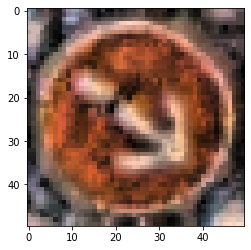

In [171]:
index = 101
print("Label: " + labels_true[index])
print("Predicted: " + labels_predicted[index])
plt.imshow(data_clahe[index])